In [2]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scanpy as sc
from scipy.stats import median_abs_deviation

## import data

### reading mtx using scanpy

In [2]:
work_dir = '/home/yuan/output/scrnaseq_lung_tissue_normal'
path = work_dir + '/alevin/GSE135893_SRX6726369_SRR9985347/GSE135893_SRX6726369_SRR9985347_alevin_results/af_quant/alevin/quants_mat.mtx'
print(path)
ann_data = sc.read_mtx(path)

/home/yuan/output/scrnaseq_lung_tissue_normal/alevin/GSE135893_SRX6726369_SRR9985347/GSE135893_SRX6726369_SRR9985347_alevin_results/af_quant/alevin/quants_mat.mtx


In [3]:
ann_data.to_df()

,0,1,2,3,4,5,6,7,8,9,...,89906,89907,89908,89909,89910,89911,89912,89913,89914,89915
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### reading h5D using scanpy

In [38]:
import os
output_dir = '/home/yuan/output' 
work_dir = os.path.join(output_dir, 'scrnaseq_lung_tissue_normal')
path = work_dir + '/alevin/mtx_conversions/combined_custom_emptydrops_filter_matrix.h5ad'
print(path)
adata = sc.read_h5ad(path)

/home/yuan/output/scrnaseq_lung_tissue_normal/alevin/mtx_conversions/combined_custom_emptydrops_filter_matrix.h5ad


In [39]:
adata

AnnData object with n_obs × n_vars = 31663 × 89916
    obs: 'sample', 'fastq_1', 'fastq_2'

In [40]:
path = os.path.join(work_dir, 'samplesheet.csv')
sample_info = pd.read_csv(path)
sample_info
# merge
adata.obs['sample'] = adata.obs['sample'].apply(lambda x: x.replace('_custom_emptydrops_filter', ''))
adata.obs= adata.obs.drop(['fastq_1', 'fastq_2'], axis=1)
adata.obs = pd.merge(adata.obs, sample_info, how='left', on='sample')
adata.obs

,sample,fastq_1,fastq_2
0,GSE135893_SRX6726370_SRR10368214,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR1036...,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR1036...
1,GSE135893_SRX6726370_SRR10368214,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR1036...,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR1036...
2,GSE135893_SRX6726370_SRR10368214,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR1036...,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR1036...
3,GSE135893_SRX6726370_SRR10368214,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR1036...,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR1036...
4,GSE135893_SRX6726370_SRR10368214,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR1036...,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR1036...
...,...,...,...
31658,GSE135893_SRX6726369_SRR9985347,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR9985...,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR9985...
31659,GSE135893_SRX6726369_SRR9985347,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR9985...,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR9985...
31660,GSE135893_SRX6726369_SRR9985347,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR9985...,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR9985...
31661,GSE135893_SRX6726369_SRR9985347,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR9985...,/home/yuan/rawdata/SRR/GSE135893/fastq/SRR9985...


In [41]:
adata.var

""
ACADM
AGL
CLCNKB
CPT2
EPHX1
...
TTTY3B-A
GOLGA2P2Y-A
TTTY4C-A
TTTY17C-A


In [11]:
dir(adata)

['T',
 'X',
 '_BACKED_ATTRS',
 '_H5_ALIASES',
 '_H5_ALIASES_NAMES',
 '_X',
 '__annotations__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adata_ref',
 '_check_dimensions',
 '_check_uniqueness',
 '_clean_up_old_format',
 '_gen_repr',
 '_get_X',
 '_get_and_delete_multicol_field',
 '_get_obs_array',
 '_get_var_array',
 '_has_X',
 '_init_as_actual',
 '_init_as_view',
 '_inplace_subset_obs',
 '_inplace_subset_var',
 '_is_view',
 '_layers',
 '_mutated_copy',
 '_normalize_indices',
 '_obs',
 '_obsm',
 '_obsp',
 '_oidx',
 '_prep_dim_index',
 '_raw',
 '_remove_unused_categories'

### use pyroe

In [4]:
import pyroe

work_dir = '/home/yuan/output/scrnaseq_lung_tissue_normal'
path = work_dir + '/alevin/GSE135893_SRX6726369_SRR9985347/GSE135893_SRX6726369_SRR9985347_alevin_results/af_quant'
adata = pyroe.load_fry(path, output_format='scRNA')

USA mode: True
Using pre-defined output format: scrna
Will populate output field X with sum of counts frorm ['S', 'A'].
Will combine ['U'] into output layer unspliced.


In [5]:
adata

AnnData object with n_obs × n_vars = 115305 × 29972
    obs: 'barcodes'
    layers: 'unspliced'

In [6]:
adata.to_df()

gene_ids,ACADM,AGL,CLCNKB,CPT2,EPHX1,CFH,HSD3B2,MTR,PKP1,PLOD1,...,RBMY2EP,TTTY13,AC007359.6,TTTY5,TTTY6,TTTY3B,GOLGA2P2Y,TTTY4C,TTTY17C,LOC102724004
barcodes,,,,,,,,,,,,,,,,,,,,,
GCAAACTTCGTAGATC,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GTTACAGGTTCGGCAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCAATCAGTCAAAGAT,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCACTCTAGTGGCACA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CTTAGGAAGACACTAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCTGCTTCAAGCTGGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GCGAGAAGTTGTTTGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTGCCGTCACGTGAGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## quality control

In [13]:
# mitochondrial genes
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes.
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata

AnnData object with n_obs × n_vars = 31663 × 89916
    obs: 'sample', 'fastq_1', 'fastq_2', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

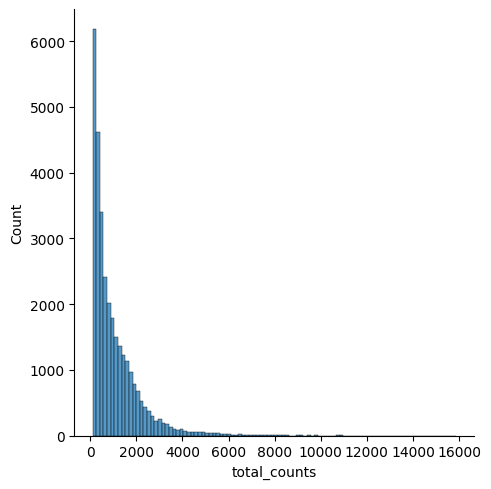

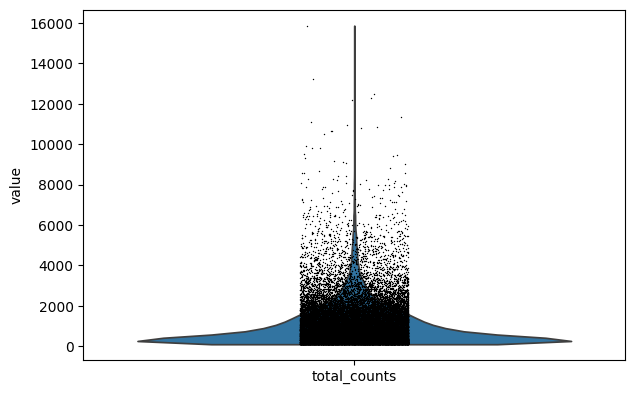

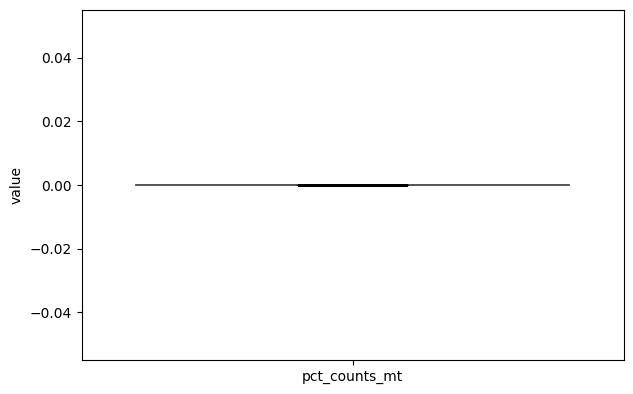

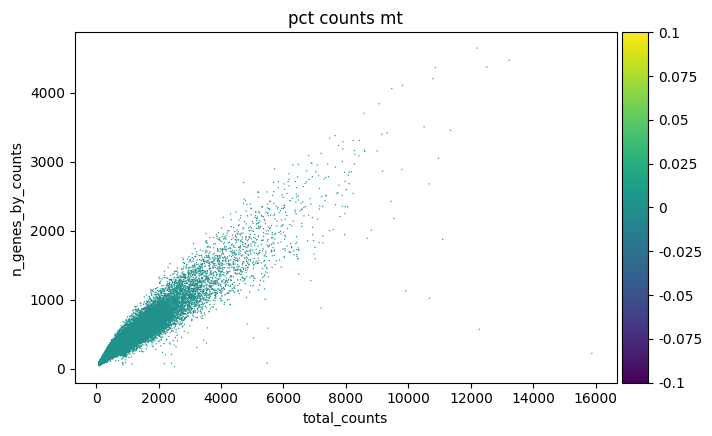

In [14]:
p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
p2 = sc.pl.violin(adata, 'total_counts')
p3 = sc.pl.violin(adata, "pct_counts_mt")
p4 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [15]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

adata.obs["outlier"] = (
    is_outlier(adata, "log1p_total_counts", 5)
    | is_outlier(adata, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata, "pct_counts_in_top_20_genes", 5)
)
adata.obs.outlier.value_counts()

outlier
False    31563
True       100
Name: count, dtype: int64

In [16]:
# pct_counts_Mt is filtered with 3 MADs. Additionally, cells with a percentage of mitochondrial counts exceeding 8 % are filtered out.
adata.obs["mt_outlier"] = is_outlier(adata, "pct_counts_mt", 3) | (adata.obs["pct_counts_mt"] > 8)
adata.obs.mt_outlier.value_counts()

print(f"Total number of cells: {adata.n_obs}")
adata = adata[(~adata.obs.outlier) & (~adata.obs.mt_outlier)].copy()

print(f"Number of cells after filtering of low quality cells: {adata.n_obs}")

Total number of cells: 31663
Number of cells after filtering of low quality cells: 31563


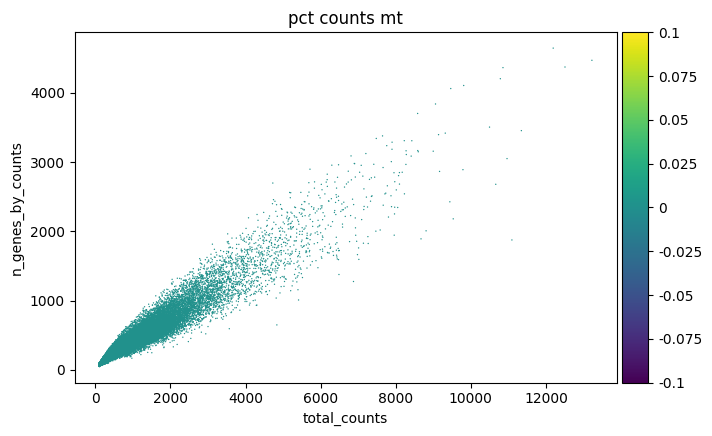

In [17]:
p1 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [18]:
adata

AnnData object with n_obs × n_vars = 31563 × 89916
    obs: 'sample', 'fastq_1', 'fastq_2', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

## normalization

In [19]:
# method 2: shifted algorithm
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

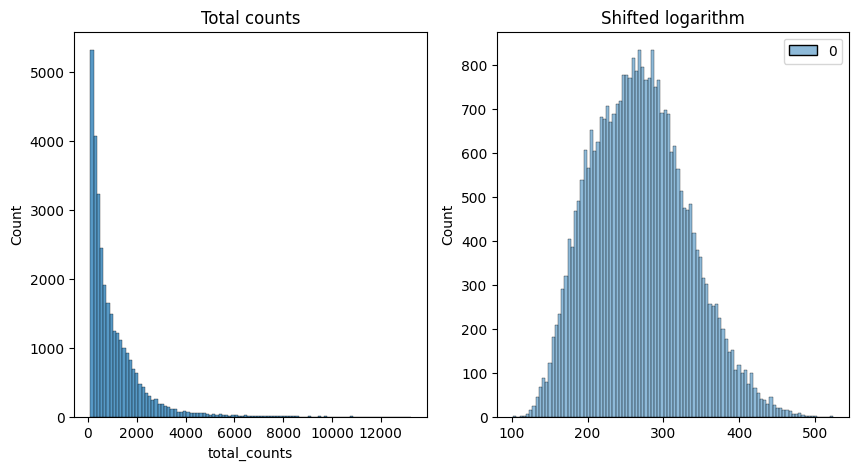

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

In [ ]:
from scipy.sparse import csr_matrix

# method 3: analyti pearson residuals
analytic_pearson = sc.experimental.pp.normalize_pearson_residuals(adata, inplace=False).fillna(0)
adata.layers["analytic_pearson_residuals"] = csr_matrix(analytic_pearson["X"])

In [21]:
analytic_pearson

{'X': array([[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.01057402, -0.00893668,         nan, ...,         nan,
                 nan,         nan],
        [-0.01495391, -0.01263836,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [-0.00528701, -0.00446834,         nan, ...,         nan,
                 nan,         nan],
        [-0.01057402, -0.00893668,         nan, ...,         nan,
                 nan,         nan]], dtype=float32),
 'theta': 100,
 'clip': None,
 'computed_on': 'adata.X'}

ValueError: No objects to concatenate

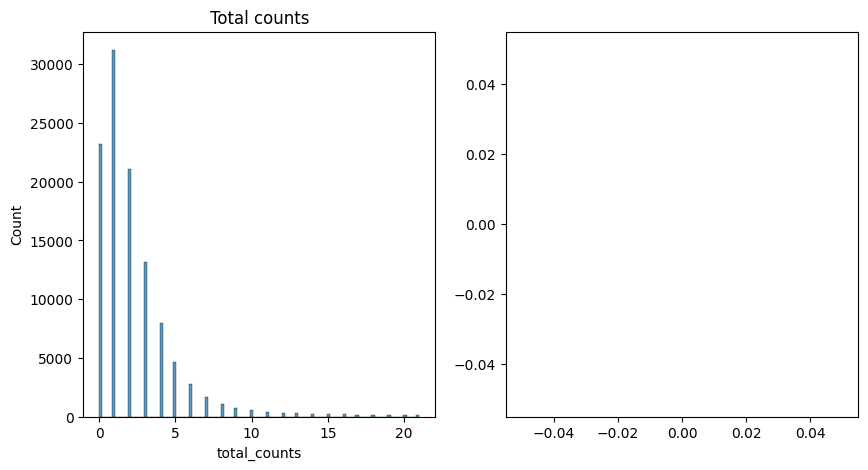

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(
    adata.layers["analytic_pearson_residuals"].sum(1), bins=100, kde=False, ax=axes[1]
)
axes[1].set_title("Analytic Pearson residuals")
plt.show()